# Movie Ratings Analytics

In [2]:
import pandas as pd
import os

In [6]:
os.getcwd()

'C:\\Users\\pedro tavares\\Desktop\\Data Science'

In [8]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [9]:
len(movies)

559

In [10]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [12]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [13]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [17]:
movies.describe()

,CriticRatings,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [19]:
movies.Film = movies.Film.astype('category')

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [85]:
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [86]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [87]:
#levels os category
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [88]:
movies.describe()

,CriticRatings,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [89]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [90]:
#Joinplots

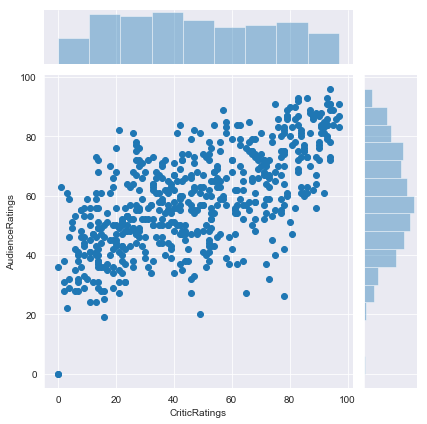

In [91]:
j = sns.jointplot(data=movies, x='CriticRatings', y ='AudienceRatings')

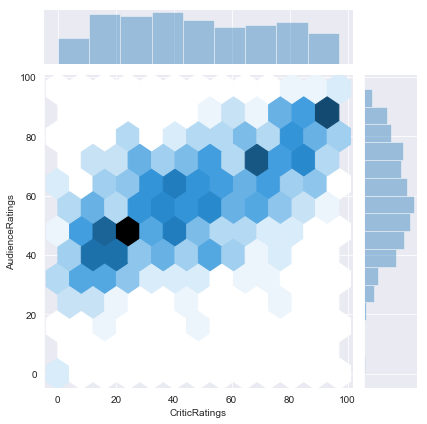

In [92]:
j = sns.jointplot(data=movies, x='CriticRatings', y ='AudienceRatings', kind='hex')

In [93]:
# Chart 1

In [94]:
## Histograms

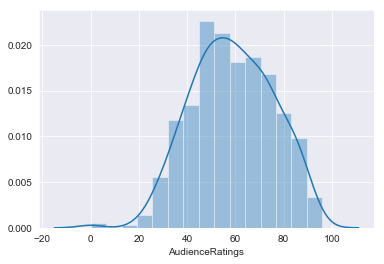

In [95]:
m1 = sns.distplot(movies.AudienceRatings, bins=15)

In [96]:
#Chart 2

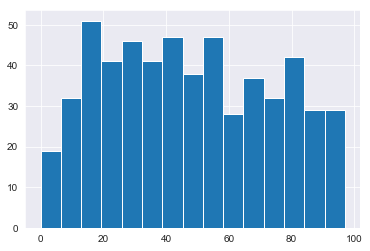

In [97]:
#seaborn function to add a grid behind the charts
sns.set_style('darkgrid')

n1 = plt.hist(movies.CriticRatings, bins=15)

In [98]:
#Chart 3

In [99]:
#Stacked Histograms

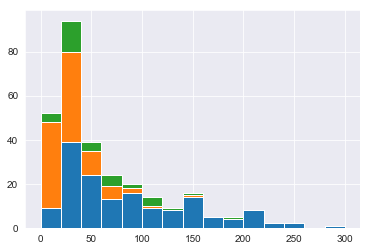

In [100]:
#plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
#plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
#plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions, 
          movies[movies.Genre == 'Thriller'].BudgetMillions
         ],
         bins=15, stacked=True)
plt.show()

In [101]:
len(movies.Genre.cat.categories)

7

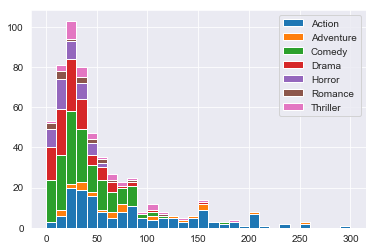

In [110]:
list1 = list()
myLabels = list()
for genre in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == genre].BudgetMillions)
    myLabels.append(genre)
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)
plt.legend()
plt.show()

In [132]:
#Chart 4
#KDE Plot (kernel density estimate)

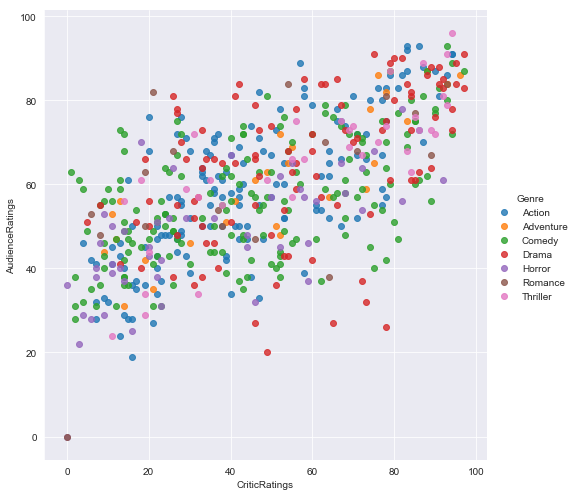

In [128]:
vis1 = sns.lmplot(data=movies, x='CriticRatings', y='AudienceRatings', fit_reg=False, hue='Genre', size=7, aspect=1)

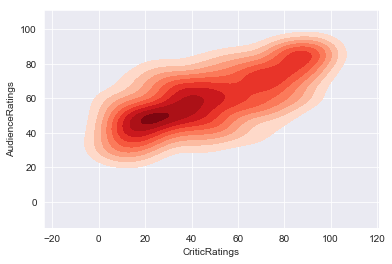

In [138]:
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')


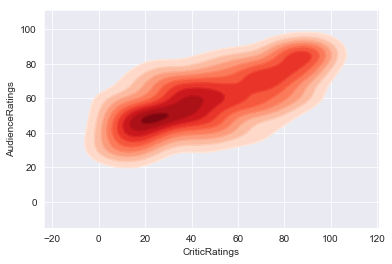

In [139]:
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')
#TIP:
k1b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds')

In [140]:
#Working with Subplots()

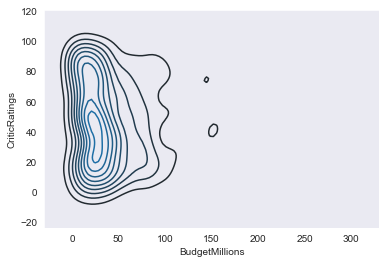

In [144]:
sns.set_style('dark')
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings)

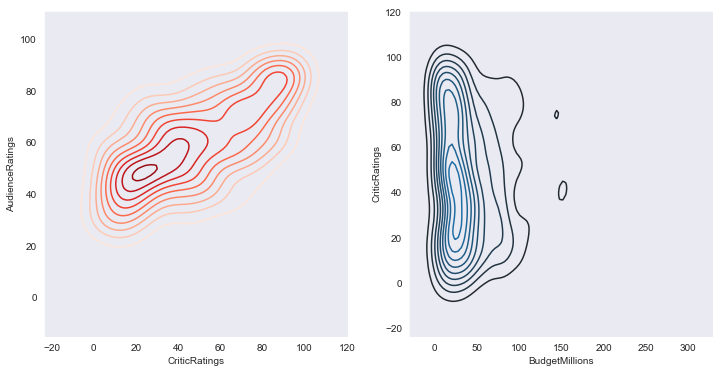

In [150]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[1])

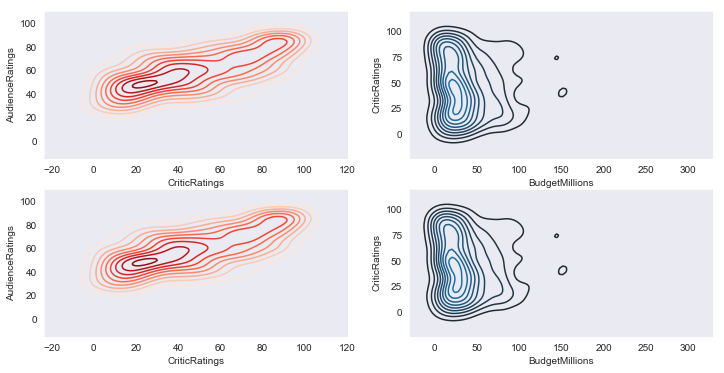

In [157]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[0,1])
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[1,0])
k4 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[1,1])

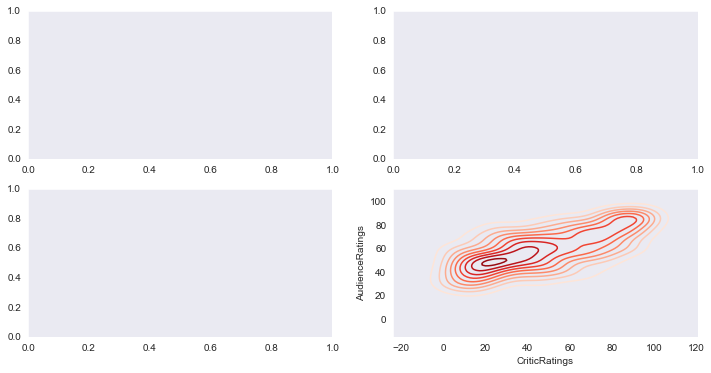

In [159]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[1,1])

[(-20, 160)]

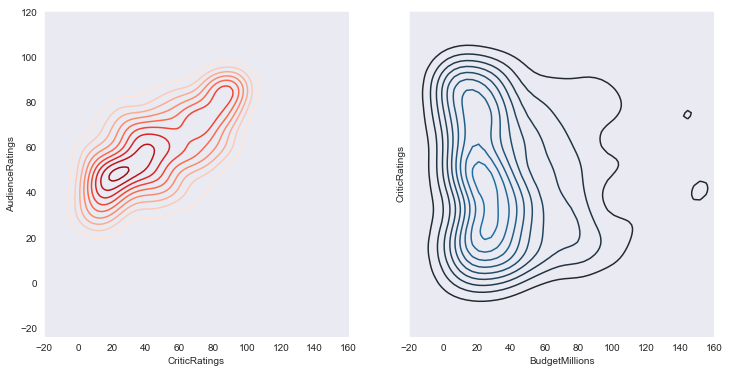

In [162]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[1])
k1.set(xlim=(-20,160))

In [163]:
#ViolinPlots

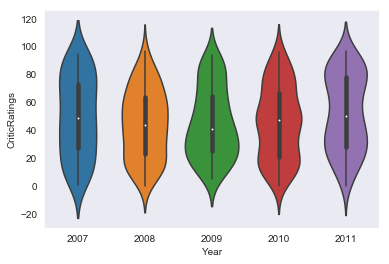

In [166]:
z = sns.violinplot(data=movies, x='Year', y='CriticRatings')

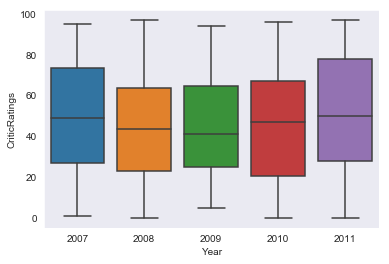

In [167]:
z = sns.boxplot(data=movies, x='Year', y='CriticRatings')

In [168]:
#creating a Facet Grid

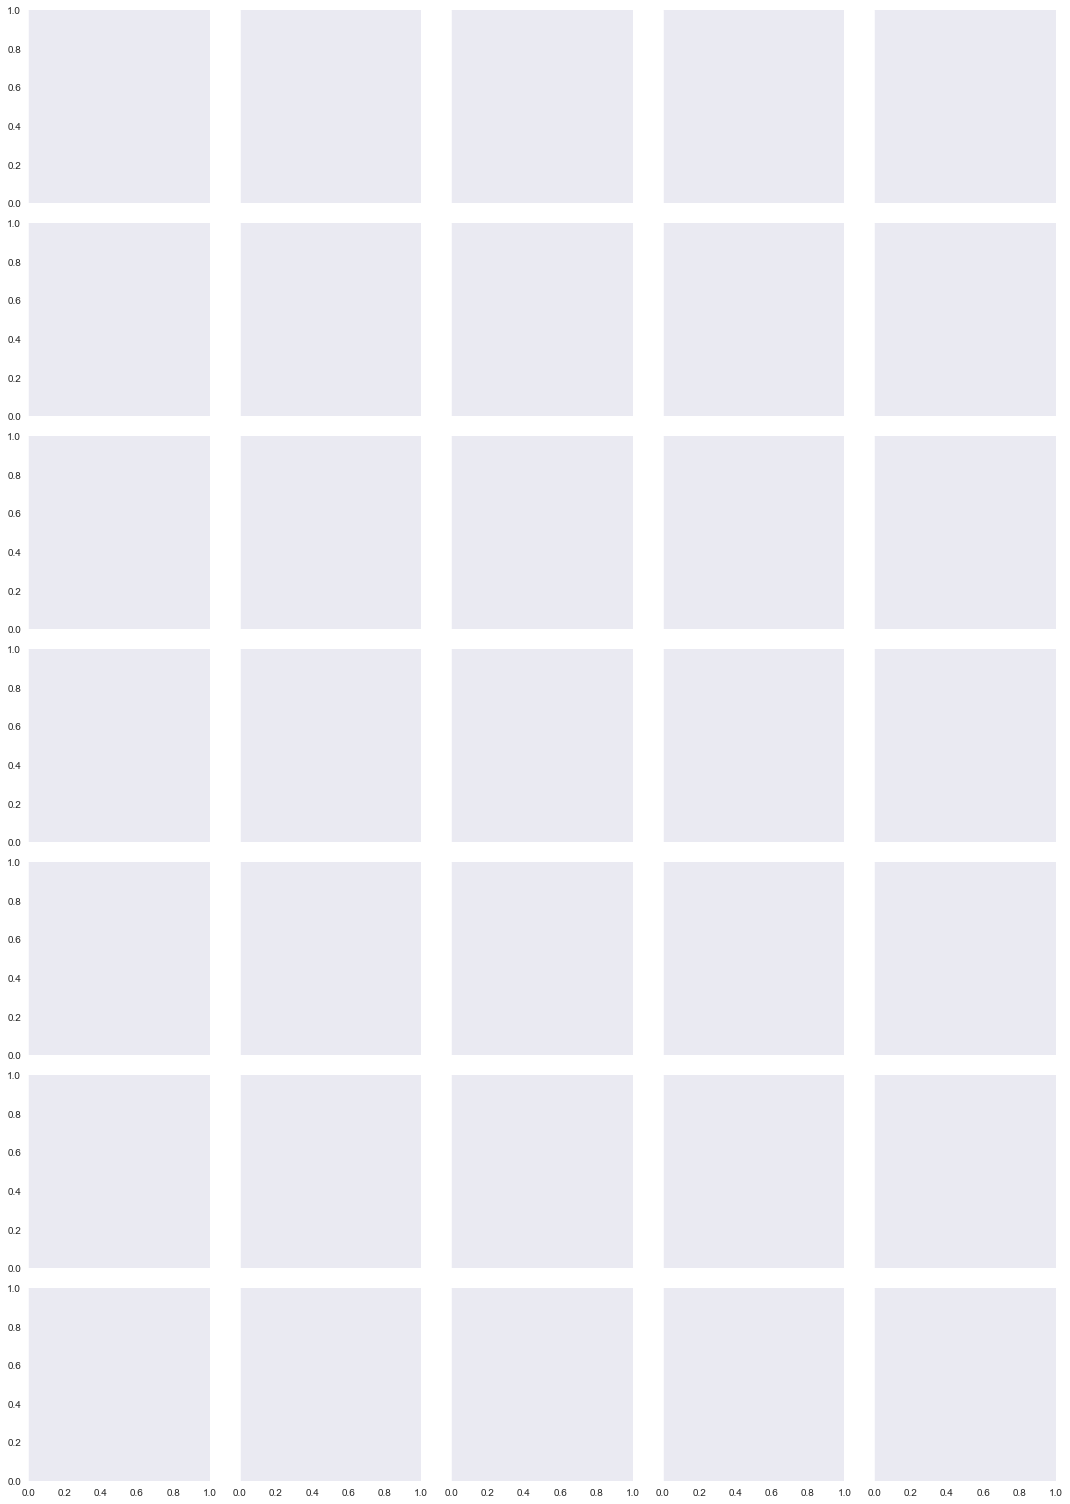

In [171]:
#g= sns.FacetGrid(movies, row='Genre', hue='Genre')
g= sns.FacetGrid(movies, row='Genre', hue='Genre', col='Year')

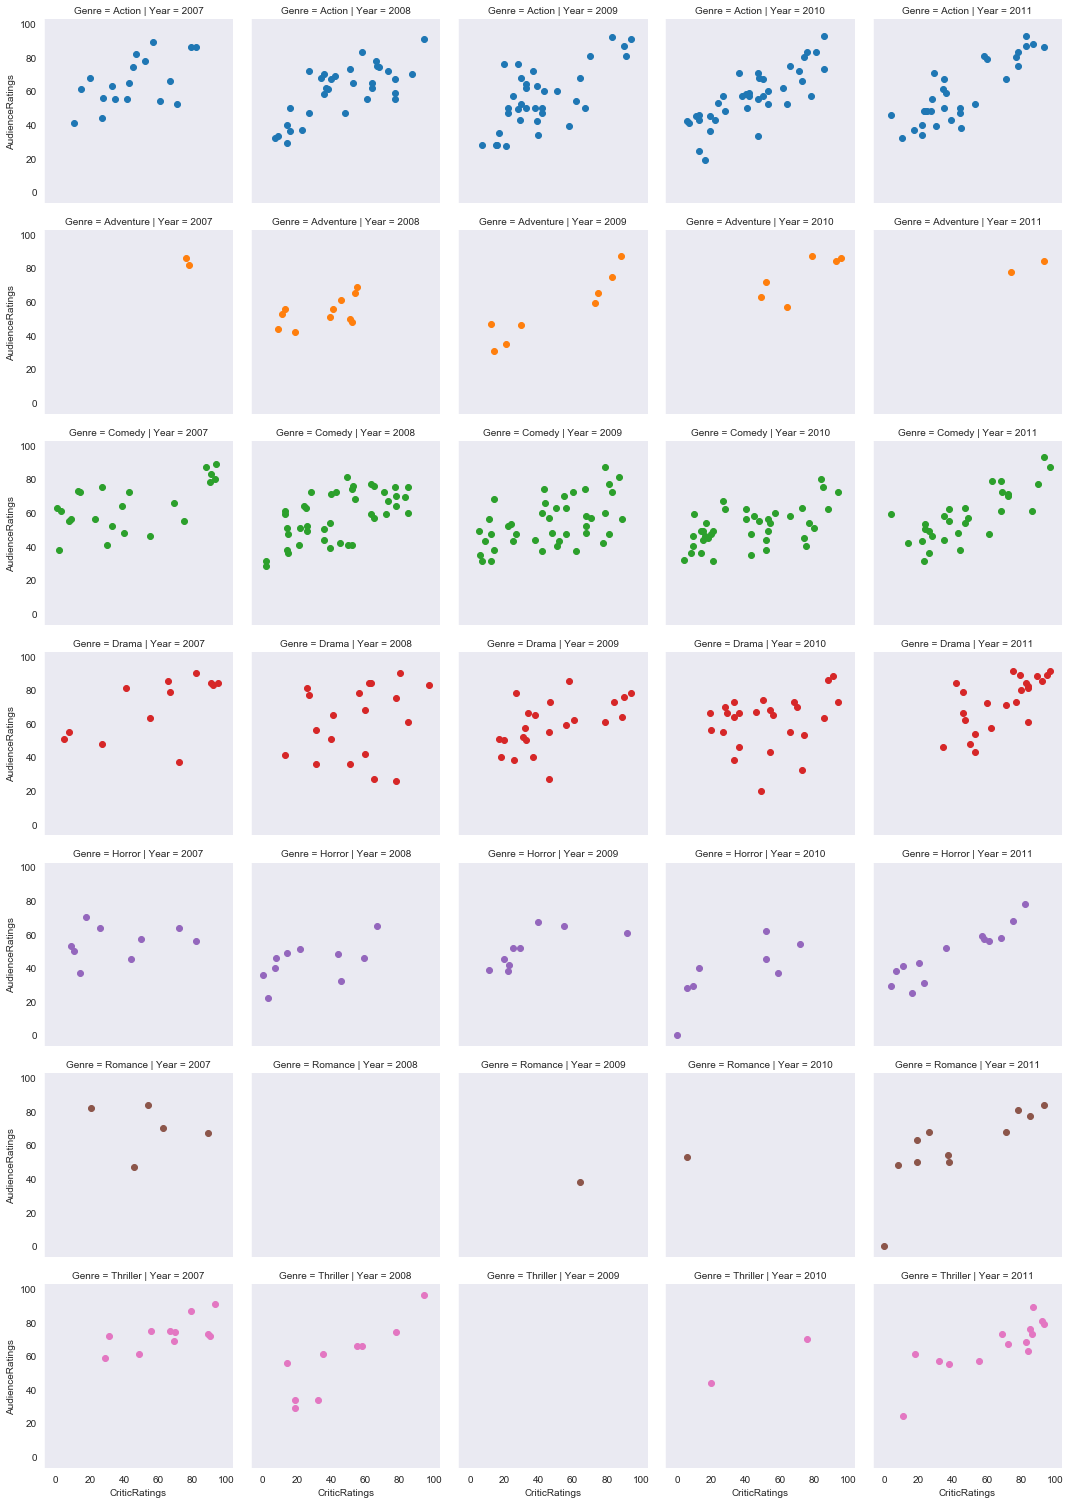

In [174]:
g= sns.FacetGrid(movies, row='Genre', hue='Genre', col='Year')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings')

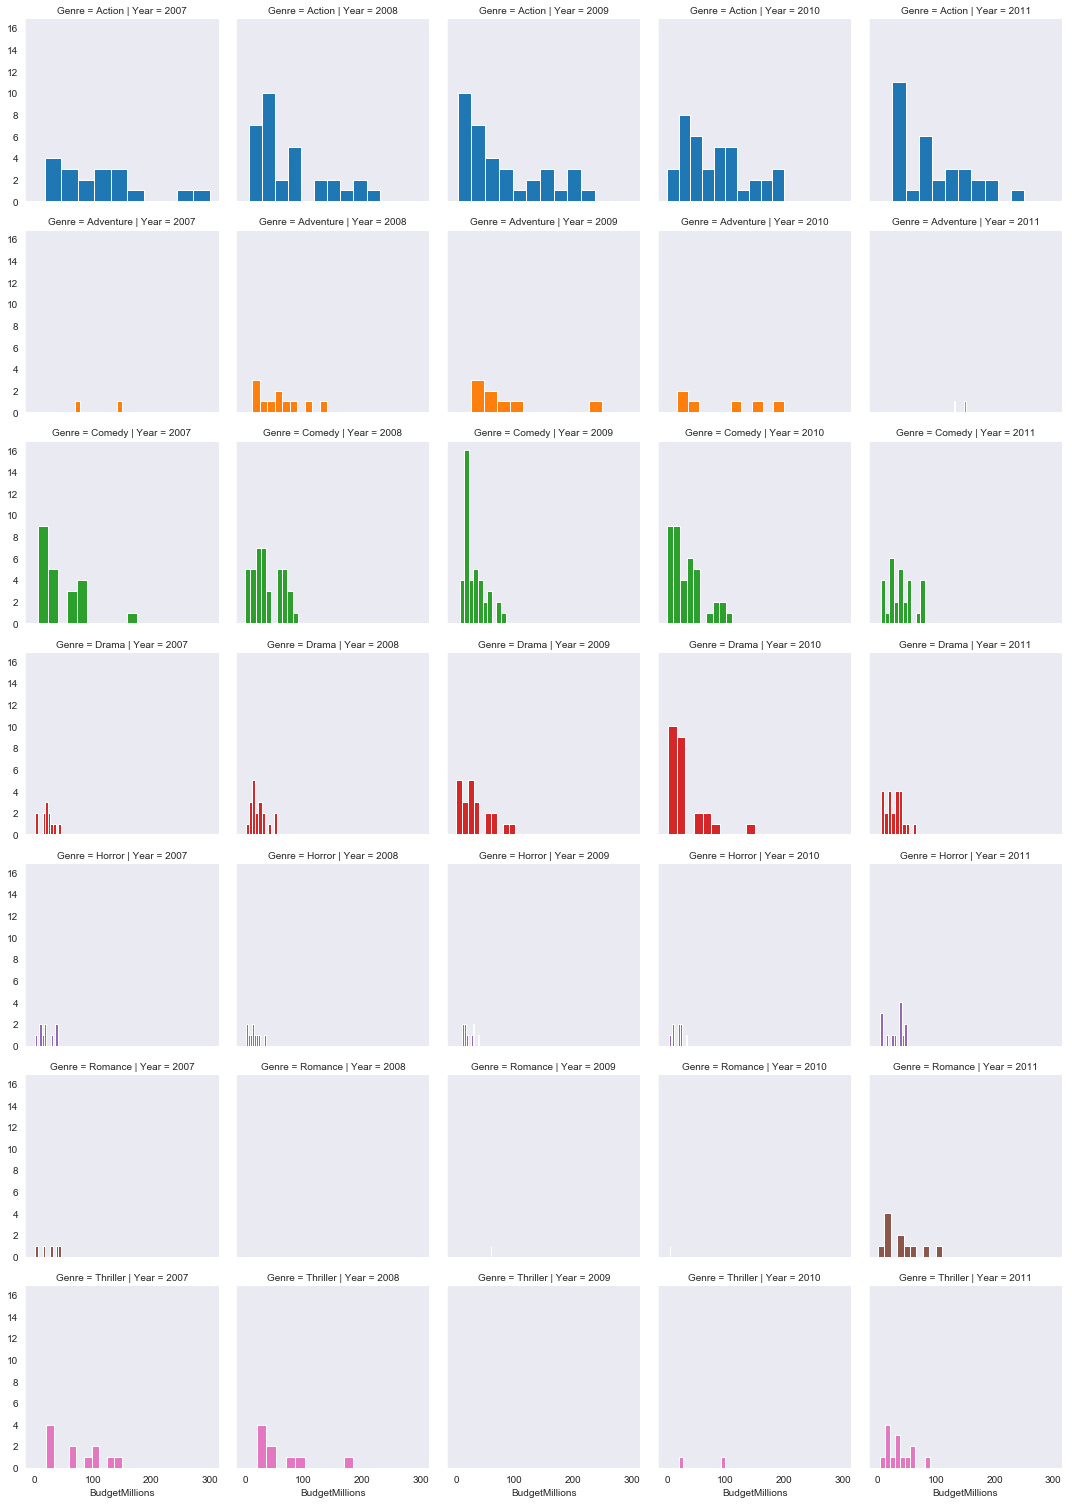

In [176]:
g= sns.FacetGrid(movies, row='Genre', hue='Genre', col='Year')
g = g.map(plt.hist, 'BudgetMillions')

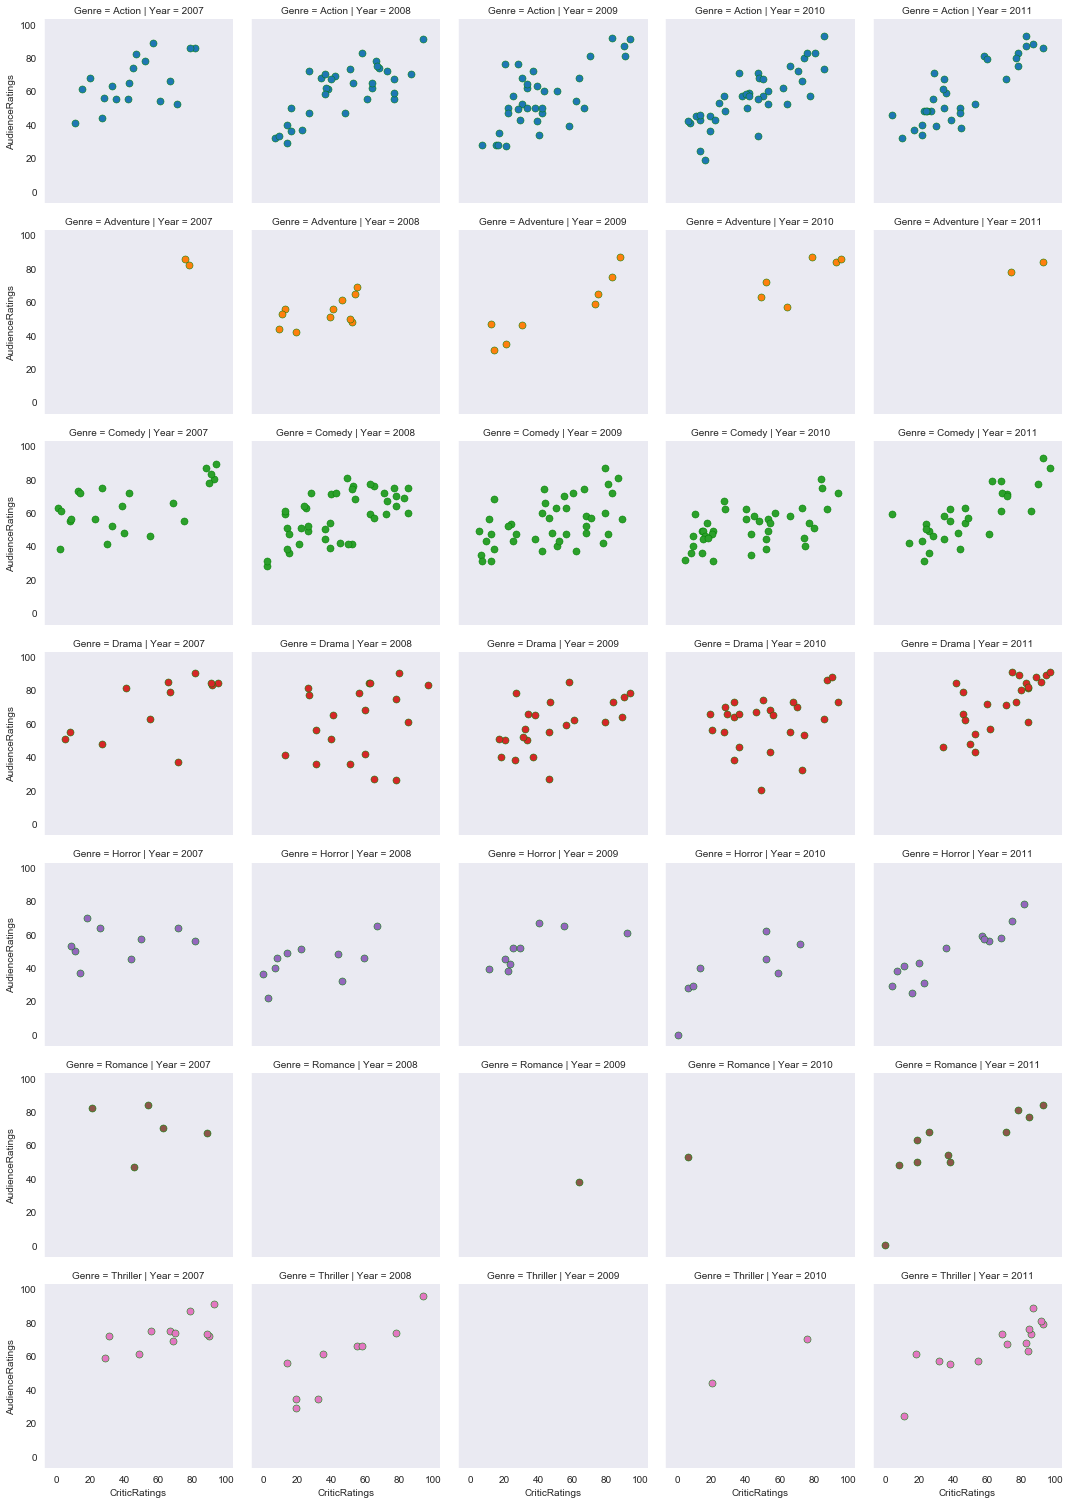

In [182]:
g= sns.FacetGrid(movies, row='Genre', hue='Genre', col='Year')
kwds = dict(s=50, linewidth='0.5', edgecolor='green')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kwds)

--------

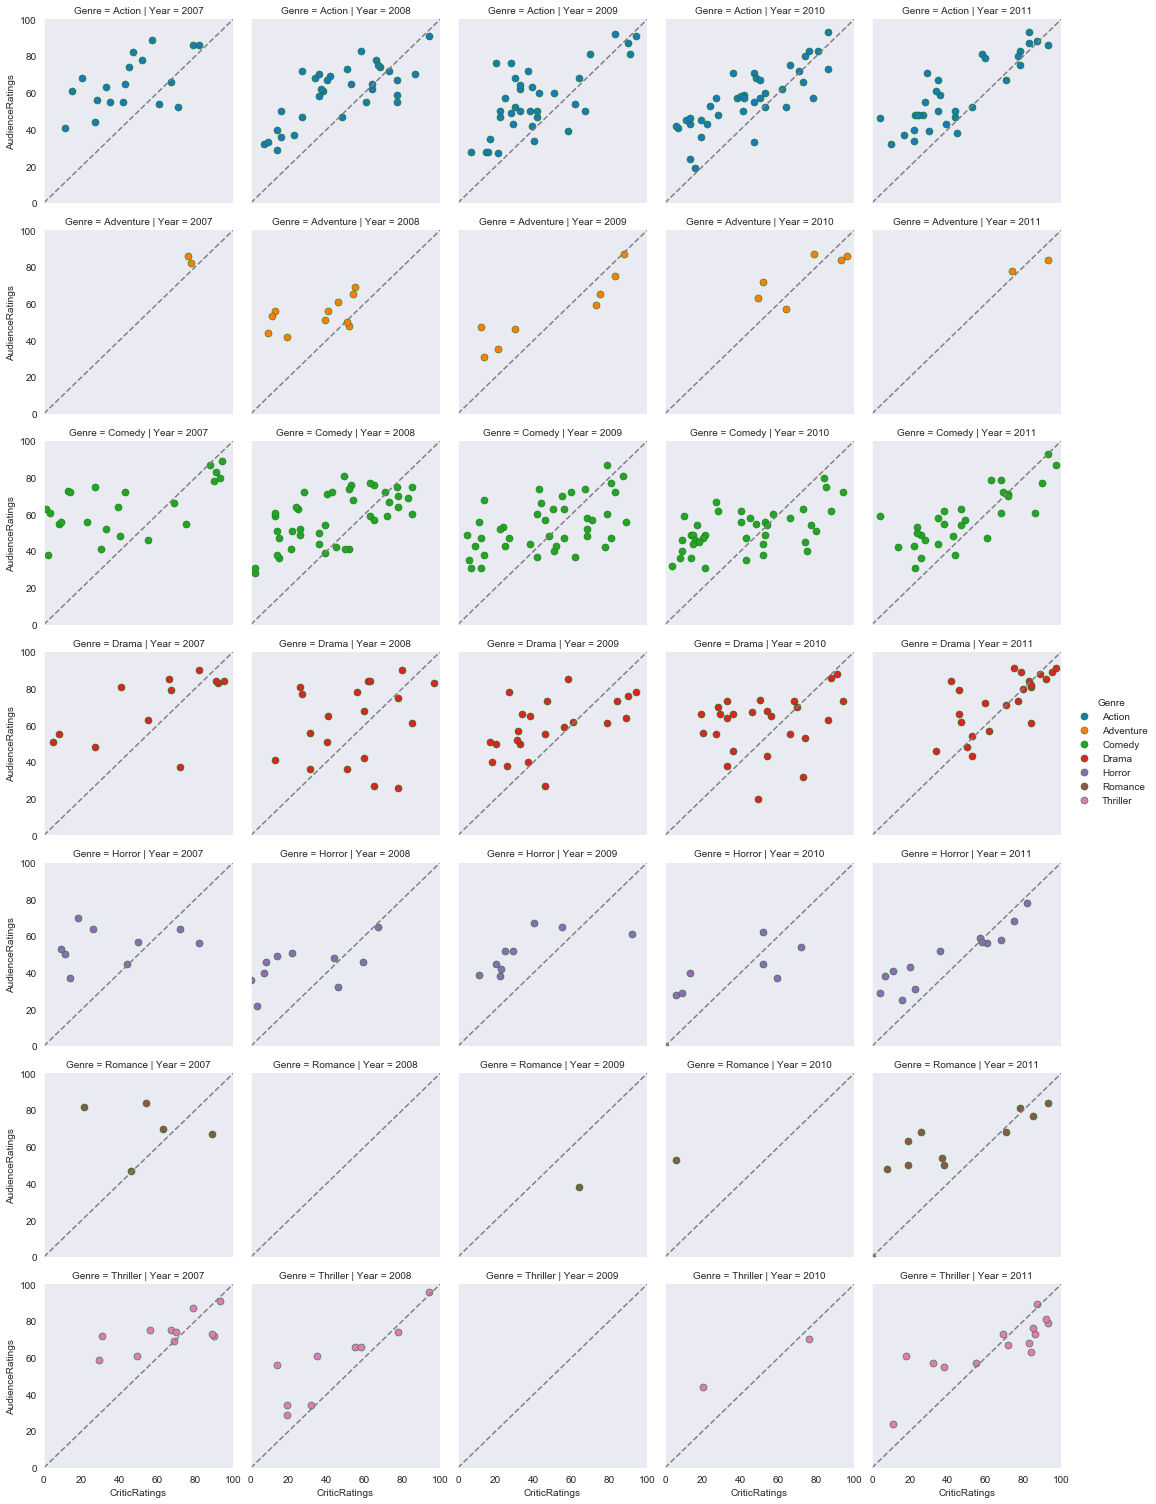

In [186]:
#Controlling Axes ans adding diagonals
g= sns.FacetGrid(movies, row='Genre', hue='Genre', col='Year')
kwds = dict(s=50, linewidth='0.5', edgecolor='green')
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kwds)
g.set(xlim=(0,100), ylim=(0,100))
#line
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='gray', ls='--')
g.add_legend()

In [187]:
#Dashboard: combination od charts

[(-20, 160)]

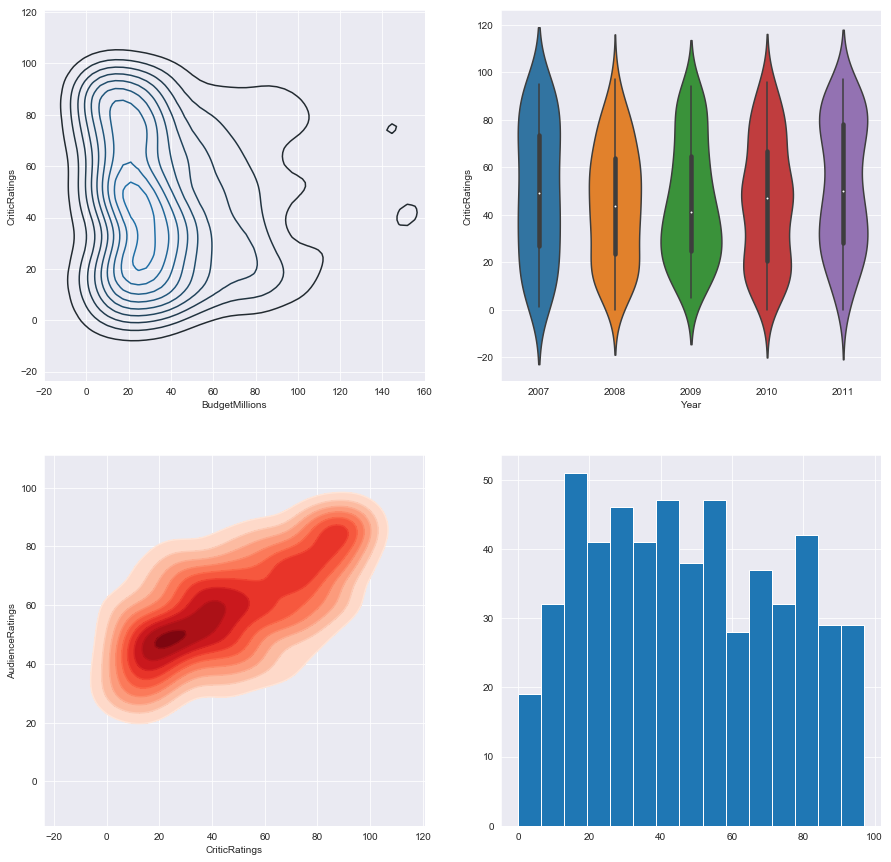

In [206]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.set_style('darkgrid')
#k1 = sns.boxplot(data=movies, x='Year', y='CriticRatings', ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[0,0])
v1 = sns.violinplot(data=movies, x='Year', y='CriticRatings', ax=axes[0,1])
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,0])
k3b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax=axes[1,0])
#no seaborn charts are added using the ax first after a "dot"
axes[1,1].n1 = plt.hist(movies.CriticRatings, bins=15)

#k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

## Styling the charts

[(-20, 160)]

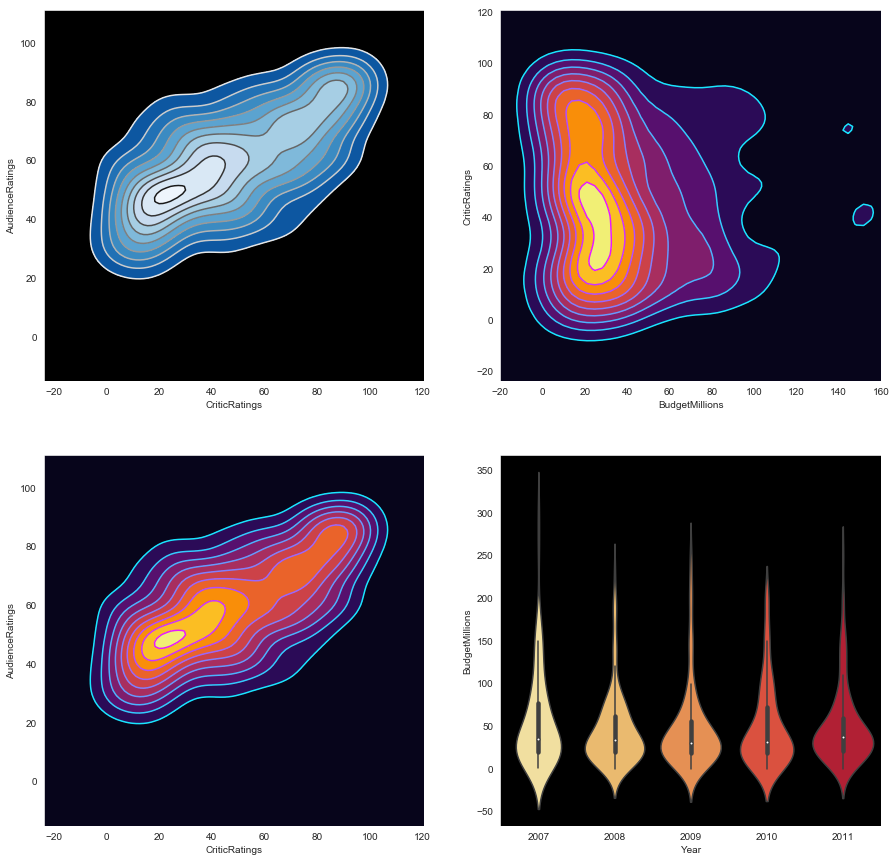

In [223]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
#background style: white, dark, darkgrid, whitegrid
#sns.set_style('darkgrid')
#black background
sns.set_style('dark', {"axes.facecolor": "black"})
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[0,0])
k1b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='gist_gray_r', ax=axes[0,0])

v1 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', palette='YlOrRd', ax=axes[1,1])

#related charts
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, cmap='cool', ax=axes[0,1])
#related charts
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade=True, shade_lowest=True, cmap='inferno', ax=axes[1,0])
k3b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='cool', ax=axes[1,0])


#k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

---------

## Thematic edits

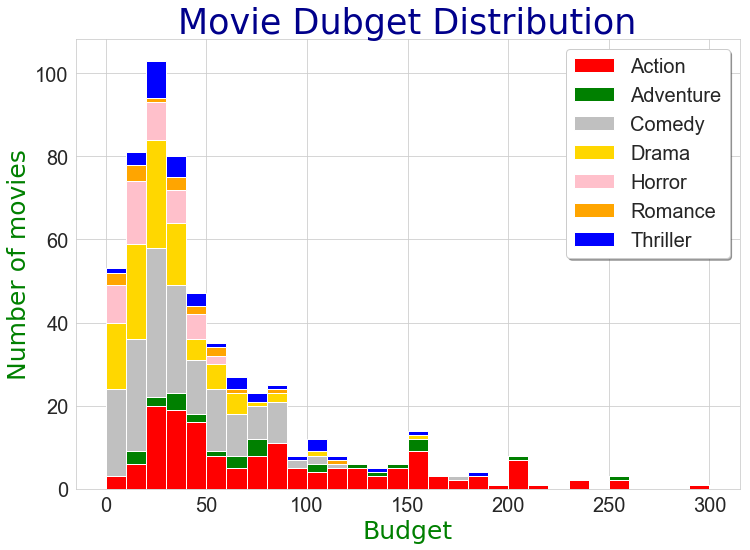

In [253]:
list1 = list()
myLabels = list()
for genre in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == genre].BudgetMillions)
    myLabels.append(genre)
sns.set_style('whitegrid')
#one chart is added in a subplot
fig, ax = plt.subplots()
#chart size
fig.set_size_inches(11.9, 8.27)
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels, color=['red', 'green', 'silver', 'gold', 'pink', 'orange', 'blue'])
#title
plt.title('Movie Dubget Distribution', fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of movies', fontsize=25, color='Green', fontname='Console')
plt.xlabel('Budget', fontsize=25, color='Green', fontname='Console')
#values
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})
plt.show()